In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.backends.backend_pdf
import seaborn as sns
import pandas as pd
sns.set_style("whitegrid")
sns.set_palette("bright", color_codes=True)

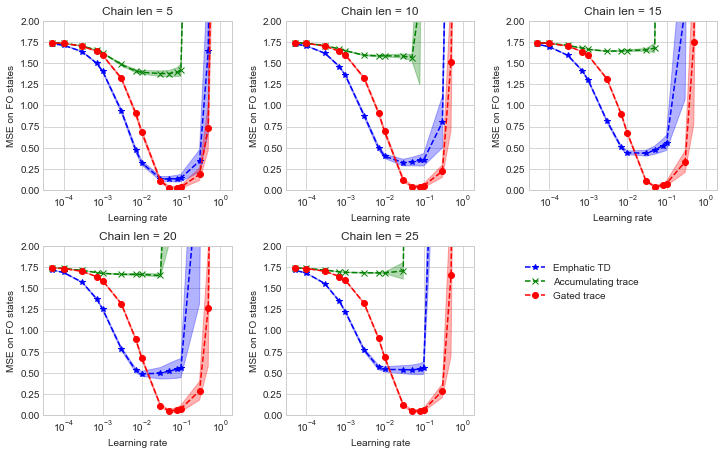

In [2]:
# Delayed effect a.k.a YChain

plt.style.use('seaborn-whitegrid')

seed = list(range(25))
length = [5, 10, 15, 20, 25]
env = "YChain"
epi = 100
ci = 0.5
pdf = matplotlib.backends.backend_pdf.PdfPages("lr_Ychain_hp_tuning.pdf")
types = ["etd", "etrace", "gated_trace"]

fig, ax = plt.subplots(2, 3, figsize=(10, 6))
fig.delaxes(ax[1,2])
fig.tight_layout(w_pad=3, h_pad=4)

learn_rate = [1.2, 1.0, 0.8, 0.5, 0.3, 0.1, 0.08, 0.05,\
              0.03, 0.01, 0.007, 0.003, 0.001, 0.0007, 0.0003, 0.0001, 0.00005]
              

name = {"etd": "Emphatic TD", "etrace": "Accumulating trace", "gated_trace": "Gated trace"}
colors = {"etd": "blue", "etrace": "green", "gated_trace": "red"}
marker = {"etd": "*", "etrace": "x", "gated_trace": "o"}

row_plt = 0
col_plt = 0
no_labels = []

for c_l in length:
    for t in types:
        lr_list = []
        avg_error_list = []
        std_error_list = []
        for lr in learn_rate:
            seed_error = []
            for se in seed:
                flag = False
                try:
                    with open("../results_YChain/"+t+"_env_"+env+"_len_"+str(c_l)+"_lr_"+str(lr)+"_seed_"+str(se)+"_all_errors.pkl", "rb") as f:
                        tmpp = list(pickle.load(f))
                        tmp_avg = np.mean(np.array(tmpp[-5:]))
                        if tmp_avg > 10 or np.isnan(tmp_avg):
                            tmp_avg = 10
                            flag = True
                        seed_error.append(tmp_avg)
                except:
                    print(t+"_len_"+str(c_l)+"_lr_"+str(lr)+"_seed_"+str(se))
            
            mean = np.mean(np.array(seed_error))
            avg_error_list.append(mean)
            if flag:
                std_error_list.append(np.zeros_like(mean))
            else:
                std_error_list.append(np.std(np.array(seed_error)))
            lr_list.append(lr)
            
        ax[row_plt, col_plt].plot(lr_list, avg_error_list, linestyle='dashed', marker=marker[t],\
                                  c=colors[t], markersize=6)
        ax[row_plt, col_plt].fill_between(lr_list, np.array(avg_error_list)+ci*np.array(std_error_list),\
                                  np.array(avg_error_list)-ci*np.array(std_error_list), color=colors[t], alpha=0.3)
        ax[row_plt, col_plt].set(xscale="log")
        ax[row_plt, col_plt].set_title("Chain len = "+str(c_l), fontsize=12)
        #ax[row_plt, col_plt].set_xticks(np.log(np.array(learn_rate)))
        ax[row_plt, col_plt].set_ylim(0,2)
        ax[row_plt, col_plt].set_xlabel("Learning rate")
        ax[row_plt, col_plt].set_ylabel("MSE on FO states")
        
        
    col_plt += 1
    if col_plt == 3:
        row_plt = 1
        col_plt = 0

    
fig.legend([name[t] for t in types], loc="right", bbox_to_anchor=(0.5, 0., 0.4, 0.8))#loc="lower center", bbox_to_anchor=(0.4, 0., 0.5, -5), ncol=3)
plt.show()
pdf.savefig(fig, bbox_inches = 'tight')
pdf.close()
    

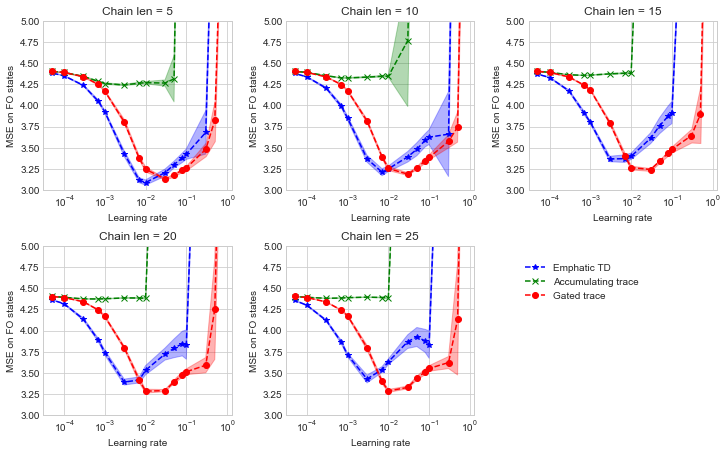

In [3]:
# Elevator

plt.style.use('seaborn-whitegrid')

seed = list(range(25))
length = [5, 10, 15, 20, 25]
env = "elevator"
epi = 200
ci = 0.5
pdf = matplotlib.backends.backend_pdf.PdfPages("lr_elevator_hp_tuning.pdf")
types = ["etd", "etrace", "gated_trace"]

fig, ax = plt.subplots(2, 3, figsize=(10, 6))
fig.delaxes(ax[1,2])
fig.tight_layout(w_pad=3, h_pad=4)

learn_rate = [0.8, 0.5, 0.3, 0.1, 0.08, 0.05,\
              0.03, 0.01, 0.007, 0.003, 0.001, 0.0007, 0.0003, 0.0001, 0.00005]
              

name = {"etd": "Emphatic TD", "etrace": "Accumulating trace", "gated_trace": "Gated trace"}
colors = {"etd": "blue", "etrace": "green", "gated_trace": "red"}
marker = {"etd": "*", "etrace": "x", "gated_trace": "o"}

row_plt = 0
col_plt = 0
no_labels = []

for c_l in length:
    for t in types:
        lr_list = []
        avg_error_list = []
        std_error_list = []
        for lr in learn_rate:
            seed_error = []
            for se in seed:
                flag = False
                try:
                    with open("../results_elevator/"+t+"_env_"+env+"_len_"+str(c_l)+"_lr_"+str(lr)+"_seed_"+str(se)+"_all_errors.pkl", "rb") as f:
                        tmpp = list(pickle.load(f))
                        tmp_avg = np.mean(np.array(tmpp[-5:]))
                        if tmp_avg > 10 or np.isnan(tmp_avg):
                            tmp_avg = 10
                            flag = True
                        seed_error.append(tmp_avg)
                except:
                    print(t+"_len_"+str(c_l)+"_lr_"+str(lr)+"_seed_"+str(se))
            
            mean = np.mean(np.array(seed_error))
            avg_error_list.append(mean)
            if flag:
                std_error_list.append(np.zeros_like(mean))
            else:
                std_error_list.append(np.std(np.array(seed_error)))
            lr_list.append(lr)
            
        ax[row_plt, col_plt].plot(lr_list, avg_error_list, linestyle='dashed', marker=marker[t],\
                                  c=colors[t], markersize=6)
        ax[row_plt, col_plt].fill_between(lr_list, np.array(avg_error_list)+ci*np.array(std_error_list),\
                                  np.array(avg_error_list)-ci*np.array(std_error_list), color=colors[t], alpha=0.3)
        ax[row_plt, col_plt].set(xscale="log")
        ax[row_plt, col_plt].set_title("Chain len = "+str(c_l), fontsize=12)
        #ax[row_plt, col_plt].set_xticks(np.log(np.array(learn_rate)))
        ax[row_plt, col_plt].set_ylim(3,5)
        ax[row_plt, col_plt].set_xlabel("Learning rate")
        ax[row_plt, col_plt].set_ylabel("MSE on FO states")
        
        
    col_plt += 1
    if col_plt == 3:
        row_plt = 1
        col_plt = 0

    
fig.legend([name[t] for t in types], loc="right", bbox_to_anchor=(0.5, 0., 0.4, 0.8))#loc="lower center", bbox_to_anchor=(0.4, 0., 0.5, -5), ncol=3)
plt.show()
pdf.savefig(fig, bbox_inches = 'tight')
pdf.close()
    

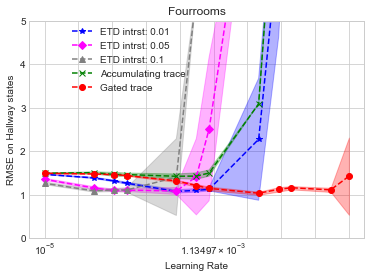

In [4]:
# Fourrooms

plt.style.use('seaborn-whitegrid')

seed = list(range(25))
env = "Fourrooms"
epi = 150
ci = 0.5
pdf = matplotlib.backends.backend_pdf.PdfPages("lr_"+env+"_hp_tuning.pdf")
types = ["etd_int_0.01","etd_int_0.05", "etd_int_0.1", "etrace", "gated_trace"] #["etd_int_0.01", "etd_int_0.05", "etd_int_0.1", "etrace", "gated_trace"]

fig = plt.figure(figsize=(6, 4))
fig.tight_layout(w_pad=3, h_pad=4)

learn_rate = [0.05, 0.03, 0.01, 0.007, 0.004, 0.001, 0.0007, 0.0004, 0.0001, 0.00007, 0.00004, 0.00001]

name = {"etd_int_0.01": "ETD intrst: 0.01", "etd_int_0.05": "ETD intrst: 0.05", "etd_int_0.1": "ETD intrst: 0.1",\
        "etrace": "Accumulating trace", "gated_trace": "Gated trace"}
colors = {"etd_int_0.01": "blue", "etd_int_0.05": "magenta", "etd_int_0.1": "gray",\
          "etrace": "green", "gated_trace": "red"}
marker = {"etd_int_0.01": "*", "etd_int_0.05":"D", "etd_int_0.1": "^",\
          "etrace": "x", "gated_trace": "o"}

no_labels = []

for t in types:
    lr_list = []
    avg_error_list = []
    std_error_list = []
    for lr in learn_rate:
        seed_error = []
        for se in seed:
            flag = False
            try:
                with open("../results_Fourrooms/"+t+"_env_"+env+"_lr_"+str(lr)+"_seed_"+str(se)+"_all_errors.pkl", "rb") as f:
                    tmpp = list(pickle.load(f))
                    tmp_avg = np.mean(np.sqrt(np.array(tmpp[-5:])))
                    if tmp_avg > 10 or np.isnan(tmp_avg):
                        tmp_avg = 10
                        flag = True
                    seed_error.append(tmp_avg)
            except:
                print(t+"_lr_"+str(lr)+"_seed_"+str(se))

        mean = np.mean(np.array(seed_error))
        avg_error_list.append(mean)
        if flag:
            std_error_list.append(np.zeros_like(mean))
        else:
            std_error_list.append(np.std(np.array(seed_error)))
        lr_list.append(lr)

    plt.plot(lr_list, avg_error_list, linestyle='dashed', marker=marker[t],\
                              c=colors[t], markersize=6)
    plt.fill_between(lr_list, np.array(avg_error_list)+ci*np.array(std_error_list),\
                              np.array(avg_error_list)-ci*np.array(std_error_list), color=colors[t], alpha=0.3)

plt.xscale("log")
plt.ylim(0,5)
plt.xticks(np.geomspace(0.00001, 0.05, 10))
plt.title("Fourrooms")
plt.xlabel("Learning Rate")
plt.ylabel("RMSE on Hallway states")
fig.legend([name[t] for t in types], ncol=1, bbox_to_anchor=(0.5, 0., -0.05, 0.9))
plt.show()
pdf.savefig(fig, bbox_inches = 'tight')
pdf.close()
    

In [ ]:
#pdf = matplotlib.backends.backend_pdf.PdfPages("jumpy_td_vs_td"+"_lr_"+str(lr)+"_env_"+str(env_len)+"_epi_"+str(episodes)+".pdf")
types = ["etrace", "gated_trace", "etd"]
seed = list(range(20))
length = list(range(5,30,5))
#pdf = matplotlib.backends.backend_pdf.PdfPages("jumpy_td_vs_td"+"_lr_"+str(lr)+"_env_"+str(env_len)+"_epi_"+str(episodes)+".pdf")
fig, ax = plt.subplots(3,2, figsize=(10, 12))
fig.tight_layout(h_pad=3)
ax[2,1].set_visible(False)
#fig.delaxes(ax[1,3])

row_plt = 0
col_plt = 0
no_labels = []

for c_l in length:
    for t in types:
        df_no_beta = pd.DataFrame(columns=["Episodes", "MSVE"])
        no_beta_rew_temp = []
        df_col1 = []
        df_col2 = []
        for se in seed:
            try:
                with open("../results/"+t+"_env_simpleChain"+"_len_"+str(c_l)+"_seed_"+str(se)+"_all_errors.pkl", "rb") as f:
                    tmpp = list(pickle.load(f))
                    no_beta_rew_temp.append(np.array(tmpp))
                    df_col2.extend(tmpp)
                    df_col1.extend([i for i in range(1,31)])
            except:
                print(t+"_len_"+str(c_l)+"_seed_"+str(se))

        df_no_beta["Episodes"] = df_col1
        df_no_beta["MSVE"] = df_col2
        no_labels.append(t)

        sns.lineplot(x="Episodes", y ="MSVE", data=df_no_beta, ax=ax[row_plt, col_plt], ci=90, err_style="band")
        
        ax[row_plt, col_plt].set_title("Chain Length: "+str(c_l))
        
    col_plt += 1
    if col_plt > 1:
        row_plt += 1
        col_plt = 0

fig.legend(types, loc='upper right')
plt.show()
#pdf.savefig(fig)
#pdf.close()
    

In [ ]:
#pdf = matplotlib.backends.backend_pdf.PdfPages("jumpy_td_vs_td"+"_lr_"+str(lr)+"_env_"+str(env_len)+"_epi_"+str(episodes)+".pdf")
types = ["etrace", "gated_trace", "etd"]
seed = list(range(20))
length = [3, 5]
#pdf = matplotlib.backends.backend_pdf.PdfPages("jumpy_td_vs_td"+"_lr_"+str(lr)+"_env_"+str(env_len)+"_epi_"+str(episodes)+".pdf")
fig, ax = plt.subplots(len(length),2, figsize=(10, 8))
fig.tight_layout(h_pad=3)
#fig.delaxes(ax[1,3])

row_plt = 0
col_plt = 0
no_labels = []

for c_l in length:
    for t in types:
        df_no_beta = pd.DataFrame(columns=["Episodes", "MSVE"])
        no_beta_rew_temp = []
        df_col1 = []
        df_col2 = []
        for se in seed:
            try:
                with open("../results/"+t+"_env_YChain"+"_len_"+str(c_l)+"_seed_"+str(se)+"_all_errors.pkl", "rb") as f:
                    tmpp = list(pickle.load(f))
                    no_beta_rew_temp.append(np.array(tmpp))
                    df_col2.extend(tmpp)
                    df_col1.extend([i for i in range(1,251)])
            except:
                print(t+"_len_"+str(c_l)+"_seed_"+str(se))

        df_no_beta["Episodes"] = df_col1
        df_no_beta["MSVE"] = df_col2
        no_labels.append(t)

        sns.lineplot(x="Episodes", y ="MSVE", data=df_no_beta, ax=ax[row_plt, 0], ci=90, err_style="band")
        ax[row_plt, 0].set_title("Error on all state for chain length: "+str(c_l))
        
    for t in types:
        df_no_beta = pd.DataFrame(columns=["Episodes", "MSVE"])
        no_beta_rew_temp = []
        df_col1 = []
        df_col2 = []
        for se in seed:
            try:
                with open("../results/"+t+"_env_YChain"+"_len_"+str(c_l)+"_seed_"+str(se)+"_emp_errors.pkl", "rb") as f:
                    tmpp = list(pickle.load(f))
                    no_beta_rew_temp.append(np.array(tmpp))
                    df_col2.extend(tmpp)
                    df_col1.extend([i for i in range(1,251)])
            except:
                print(t+"_len_"+str(c_l)+"_seed_"+str(se))

        df_no_beta["Episodes"] = df_col1
        df_no_beta["MSVE"] = df_col2
        no_labels.append(t)

        sns.lineplot(x="Episodes", y ="MSVE", data=df_no_beta, ax=ax[row_plt, 1], ci=90, err_style="band")
        ax[row_plt, 1].set_title("Error on emp states for chain length: "+str(c_l))
        
    row_plt += 1

fig.legend(types)
plt.show()
#pdf.savefig(fig)
#pdf.close()
    

In [ ]:
#pdf = matplotlib.backends.backend_pdf.PdfPages("jumpy_td_vs_td"+"_lr_"+str(lr)+"_env_"+str(env_len)+"_epi_"+str(episodes)+".pdf")
types = ["etrace", "gated_trace", "etd"]
seed = list(range(25))
length = [5, 10, 15, 20, 25, 40]
learn_rate = [0.1, 0.07, 0.03, 0.01, 0.007, 0.003, 0.001, 0.0007, 0.0003]
env = "elevator"
epi = 75
#pdf = matplotlib.backends.backend_pdf.PdfPages("jumpy_td_vs_td"+"_lr_"+str(lr)+"_env_"+str(env_len)+"_epi_"+str(episodes)+".pdf")
fig, ax = plt.subplots(len(length), len(types), figsize=(10, 24))
fig.tight_layout(h_pad=3)
#fig.delaxes(ax[1,3])

row_plt = 0
col_plt = 0
no_labels = []

for c_l in length:
    for t in types:
        for lr in learn_rate:
            df_no_beta = pd.DataFrame(columns=["Episodes", "MSVE"])
            no_beta_rew_temp = []
            df_col1 = []
            df_col2 = []
            for se in seed:
                try:
                    with open("../results/"+t+"_env_"+env+"_len_"+str(c_l)+"_lr_"+str(lr)+"_seed_"+str(se)+"_all_errors.pkl", "rb") as f:
                        tmpp = list(pickle.load(f))
                        no_beta_rew_temp.append(np.array(tmpp))
                        df_col2.extend(tmpp)
                        df_col1.extend([i for i in range(1,epi+1)])
                except:
                    print(t+"_len_"+str(c_l)+"_lr_"+str(lr)+"_seed_"+str(se))

            df_no_beta["Episodes"] = df_col1
            df_no_beta["MSE"] = df_col2
            no_labels.append(learn_rate)

            sns.lineplot(x="Episodes", y ="MSE", data=df_no_beta, ax=ax[row_plt, col_plt], ci=90, err_style="band")
        
        col_plt += 1
        '''
        for t in types:
            df_no_beta = pd.DataFrame(columns=["Episodes", "MSVE"])
            no_beta_rew_temp = []
            df_col1 = []
            df_col2 = []
            for se in seed:
                try:
                    with open("../results/"+t+"_env_"+env+"_len_"+str(c_l)+"_lr_"+str(lr)+"_seed_"+str(se)+"_emp_errors.pkl", "rb") as f:
                        tmpp = list(pickle.load(f))
                        no_beta_rew_temp.append(np.array(tmpp))
                        df_col2.extend(tmpp)
                        df_col1.extend([i for i in range(1,epi+1)])
                except:
                    print(t+"_len_"+str(c_l)+"_lr_"+str(lr)+"_seed_"+str(se))

            df_no_beta["Episodes"] = df_col1
            df_no_beta["MSVE"] = df_col2
            no_labels.append(t)

            sns.lineplot(x="Episodes", y ="MSVE", data=df_no_beta, ax=ax[row_plt, 1], ci=90, err_style="band")
            ax[row_plt, 1].set_title("Error-emp states length:"+str(c_l)+" lr:"+str(lr))

        row_plt += 1
        '''
    row_plt += 1
    col_plt = 0

fig.legend(learn_rate)
plt.show()
#pdf.savefig(fig)
#pdf.close()
    

In [ ]:
#pdf = matplotlib.backends.backend_pdf.PdfPages("jumpy_td_vs_td"+"_lr_"+str(lr)+"_env_"+str(env_len)+"_epi_"+str(episodes)+".pdf")
seed = list(range(25))
length = [5, 10, 15, 20, 25, 40]
env = "elevator"
epi = 75
#pdf = matplotlib.backends.backend_pdf.PdfPages("jumpy_td_vs_td"+"_lr_"+str(lr)+"_env_"+str(env_len)+"_epi_"+str(episodes)+".pdf")
#fig.delaxes(ax[1,3])
types = ["etd", "etrace", "gated_trace"]

fig, ax = plt.subplots(len(types), len(length), figsize=(14, 10))
fig.tight_layout(h_pad=3, w_pad=3)

learn_rate_t = {"etd":[0.01, 0.007, 0.003, 0.001, 0.0007, 0.0003], "etrace": [0.001, 0.0007, 0.0003],\
                "gated_trace":[0.1, 0.07, 0.03, 0.01, 0.007, 0.003, 0.001, 0.0007, 0.0003]}

#learn_rate_t = {"etd":[0.01, 0.007], "etrace": [0.003, 0.001],\
#               "gated_trace":[0.1, 0.07]}

name = {"etd": "Emphatic TD", "etrace": "Accumulating trace", "gated_trace": "Gated trace"}

row_plt = 0
col_plt = 0
no_labels = []

for t in types:
    
    learn_rate = learn_rate_t[t]
    
    for c_l in length:
        for lr in learn_rate:
            df_no_beta = pd.DataFrame(columns=["Episodes", "MSE"])
            no_beta_rew_temp = []
            df_col1 = []
            df_col2 = []
            for se in seed:
                try:
                    with open("../results/"+t+"_env_"+env+"_len_"+str(c_l)+"_lr_"+str(lr)+"_seed_"+str(se)+"_all_errors.pkl", "rb") as f:
                        tmpp = list(pickle.load(f))
                        no_beta_rew_temp.append(np.array(tmpp))
                        df_col2.extend(tmpp)
                        df_col1.extend([i for i in range(1,epi+1)])
                except:
                    print(t+"_len_"+str(c_l)+"_lr_"+str(lr)+"_seed_"+str(se))

            df_no_beta["Episodes"] = df_col1
            df_no_beta["MSE"] = df_col2
            no_labels.append(learn_rate)

            sns.lineplot(x="Episodes", y ="MSE", data=df_no_beta, ax=ax[row_plt, col_plt], ci=90, err_style="band")
        
        col_plt += 1
    row_plt += 1
    col_plt = 0

for axi, col in zip(ax[0], length):
    axi.set_title("Chain len = "+str(col))

for axi, row in zip(ax[:,0], types):
    axi.set_ylabel(name[row], rotation=90, size="large")
    axi.legend(learn_rate_t[row], ncol=len(learn_rate_t[row]), loc="lower center")
    
plt.show()
#pdf.savefig(fig)
#pdf.close()
    

In [ ]:
seed = list(range(25))
length = [5, 10, 15, 20, 25, 40]
env = "elevator"
epi = 75
pdf = matplotlib.backends.backend_pdf.PdfPages("lr_chain_hp_tuning.pdf")
#fig.delaxes(ax[1,3])
types = ["etd", "etrace", "gated_trace"]

fig, ax = plt.subplots(2, 3, figsize=(10, 6))
fig.tight_layout(w_pad=3, h_pad=4)

learn_rate = [0.1, 0.07, 0.03, 0.01, 0.007, 0.003, 0.001, 0.0007, 0.0003]

name = {"etd": "Emphatic TD", "etrace": "Accumulating trace", "gated_trace": "Gated trace"}

row_plt = 0
col_plt = 0
no_labels = []

for c_l in length:
    for t in types:
        df_no_beta = pd.DataFrame(columns=["type", "LR", "MSE"])
        df_col1 = []
        df_col2 = []
        seed_error = []
        for lr in learn_rate: 
            for se in seed:
                try:
                    with open("../results/"+t+"_env_"+env+"_len_"+str(c_l)+"_lr_"+str(lr)+"_seed_"+str(se)+"_all_errors.pkl", "rb") as f:
                        tmpp = list(pickle.load(f))
                        tmp_avg = np.mean(np.array(tmpp[-10:]))
                        if tmp_avg > 10 or np.isnan(tmp_avg):
                            tmp_avg = 10
                        seed_error.append(tmp_avg)
                        df_col2.append(lr)
                        df_col1.append(t)
                except:
                    print(t+"_len_"+str(c_l)+"_lr_"+str(lr)+"_seed_"+str(se))

        df_no_beta["LR"] = df_col2
        df_no_beta["MSE"] = seed_error
        df_no_beta["type"] = df_col1

        ax[row_plt, col_plt].set(xscale="log")
        ax[row_plt, col_plt].set_title("Chain len = "+str(c_l))
        sns.lineplot(x="LR", y ="MSE", data=df_no_beta, ax=ax[row_plt, col_plt], ci=90, err_style="band")
        ax[row_plt, col_plt].set_ylim(0,5)
        
    col_plt += 1
    if col_plt == 3:
        row_plt = 1
        col_plt = 0

    
fig.legend([name[t] for t in types], ncol=3, loc="lower center")
plt.show()
pdf.savefig(fig, bbox_inches = 'tight')
pdf.close()
    

In [ ]:
plt.style.use('seaborn-whitegrid')

seed = list(range(25))
length = [5, 10, 15, 20, 25]
env = "YChain"
epi = 50
ci = 0.5
pdf = matplotlib.backends.backend_pdf.PdfPages("best_Ychain_perf.pdf")
types = ["etd", "etrace", "gated_trace"]

fig, ax = plt.subplots(2, 3, figsize=(10, 6))
fig.delaxes(ax[1,2])
fig.tight_layout(w_pad=3, h_pad=4)

all_lr = {"etd":{5:0.007, 10:0.001, 15:0.00005, 20:0.00005, 25:0.00005},"etrace":{5:0.01, 10:0.0003, 15:0.00005, 20:0.00005, 25:0.00005},"gated_trace":{5:0.01, 10:0.0003, 15:0.00005, 20:0.00005, 25:0.00005}}

name = {"etd": "Emphatic TD", "etrace": "Accumulating trace", "gated_trace": "Gated trace"}
colors = {"etd": "blue", "etrace": "green", "gated_trace": "red"}
marker = {"etd": "*", "etrace": "x", "gated_trace": "o"}

row_plt = 0
col_plt = 0
no_labels = []

for c_l in length:
    for t in types:
        lr = all_lr[t][c_l]
        seed_error = []
        for se in seed:
            try:
                with open("../results/"+t+"_env_"+env+"_len_"+str(c_l)+"_lr_"+str(lr)+"_seed_"+str(se)+"_all_errors.pkl", "rb") as f:
                    tmpp = list(pickle.load(f))
                    #tmp_avg = np.mean(np.array(tmpp[-5:]))
                    #if tmp_avg > 100 or np.isnan(tmp_avg):
                        #tmp_avg = 100
                    seed_error.append(tmpp)
            except:
                print(t+"_len_"+str(c_l)+"_lr_"+str(lr)+"_seed_"+str(se))
        
        avg_error = np.mean(np.array(seed_error), axis=0)
        std_error = np.std(np.array(seed_error), axis=0)
            
        ax[row_plt, col_plt].plot(range(1,epi+1), avg_error,
                                  c=colors[t], markersize=6)
        ax[row_plt, col_plt].fill_between(range(1,epi+1), avg_error+ci*std_error,\
                                  avg_error-ci*std_error, color=colors[t], alpha=0.3)
        #ax[row_plt, col_plt].set(xscale="log")
        ax[row_plt, col_plt].set_title("Chain len = "+str(c_l))
        ax[row_plt, col_plt].set_xticks(np.log(np.array(learn_rate)))
        #ax[row_plt, col_plt].set_ylim(0.5,5)
        ax[row_plt, col_plt].set_xlabel("Episodes")
        ax[row_plt, col_plt].set_ylabel("MSE on FO states")
        
        
    col_plt += 1
    if col_plt == 3:
        row_plt = 1
        col_plt = 0

    
fig.legend([name[t] for t in types], loc="right", bbox_to_anchor=(0.5, 0., 0.4, 0.6))
plt.show()
pdf.savefig(fig, bbox_inches = 'tight')
pdf.close()
    

In [ ]:
np.random.randn(3)